In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image

Rafael Beltrán Hernández

## Problema del elemento en voladizo

Para este problema se analizaron las magnitudes de las fuerzas cortantes primarias y secundarias y se conculyó que para el caso a), se tiene que es preferible dejarlas en diagonal, con un angulo de 45° entre ellos. Mientras que en el caso de los 3 tornillos, es preferible dejar dos en la base y uno arriba. Estas configuraciones reducen las magnitudes de los esfuerzos con el fin de promover seguridad en el sistema.

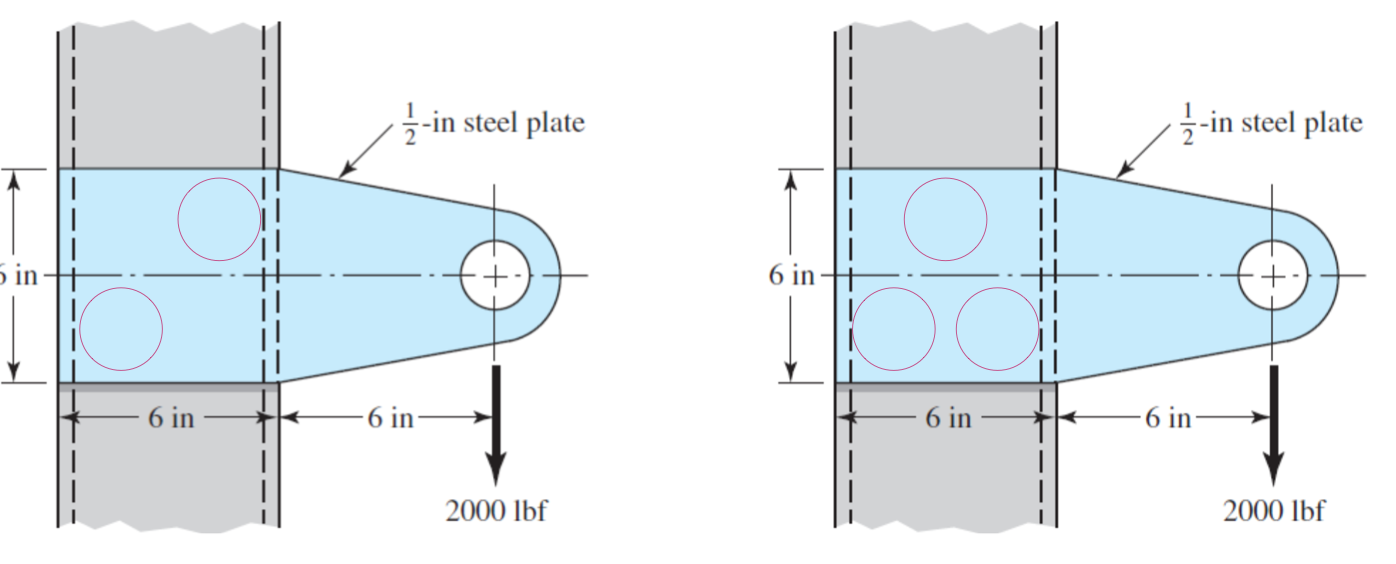

In [4]:
Image(filename='Imagenes Tareas/P1 S15.png')

## Placa de acero 1020 HR

Primero se encuentra el centroide de la región que está delimitada por los tornillos. El cual está a 2 in de A en direccion completamente vertical. También se tiene que las fuerzas cortantes primarias son iguales.

\begin{equation}
    F'_A = F'_B = F'_C = 1 kip
\end{equation}

Por otro lado, se tiene que las fuerzas de momentos (cortantes secundarias) son diferentes cada una, pero primero se encuentra el momento total con:


\begin{equation}
    M = (15-2.5)(3) kip-in
\end{equation}

Ya una vez obtenido el momento, se encuentra la fuerza secundaria de cada uno de los puntos:

\begin{equation}
   F''_A = \frac{2M}{2+2+4}
\end{equation}

\begin{equation}
   F''_B = \frac{\sqrt{2}M}{2+2+4}
\end{equation}

\begin{equation}
   F''_C = \frac{\sqrt{2}M}{2+2+4}
\end{equation}

Ahora se encuentran las magnitudes de las fuerzas, con trigonometría se logra que:

\begin{equation}
   F_A = \sqrt{(F'_A)^2 + (F''_A)^2}
\end{equation}

\begin{equation}
   F_{B_x} = F''_B \cos{45} \\
   F_{B_y} = F''_B \cos{45} - F'_B \\
\end{equation}

\begin{equation}
   F_{C_x} = F''_B \cos{45} \\
   F_{C_y} = - F''_B \cos{45} - F'_B \\
\end{equation}

Con los valores de las fuerzas se encuentra el de mayor magnitud, y posteriormente con el factor de seguridad se encuentra resolviendo por la falla por cortante con los datos de la tabla 8-9.

In [5]:
# Momentos y fuerzas
F_p = 1 # kip
M = 3*(15-2.5)
F_ap = 2*M/8
F_bp = np.sqrt(2)*M/8
F_cp = F_bp
# Magnitudes
Fa = np.sqrt(F_p**2 + F_ap**2)
Fbx = F_bp*np.cos(np.radians(25))
Fby = Fbx - F_p
Fb = np.sqrt(Fbx**2 + abs(Fby)**2)
Fcy = - F_p - Fbx
Fcx = Fbx
Fc = np.sqrt(abs(Fcy)**2 + Fcx**2)
print('Las fuerzas totales en A, B y C son respectivamente',round(Fa,2),round(Fb,2),round(Fc,2),'kip')

Las fuerzas totales en A, B y C son respectivamente 9.43 7.82 9.23 kip


Se tiene que el valor máximo de fuerza está en A, entonces se tomara este valor como la referencia para encontrar el diámetro de los tornillos

In [20]:
n = 2
d = lambda sy: 4*Fa*n/(3*np.pi*0.577*sy) # funcion que encuentra el diámetro de los tornillos usando la teoria de falla por cortante en los tornillos
Sy = [36,57,36,100,92,81,92,115,130,130] 
d_minimos = [(1/4)/1.5,(1/4)/1.5,(7/8)/1.5,(1/4)/1.5,(1/4)/1.5,(1 + 1/8)/1.5,(1/4)/1.5,(1/4)/1.5,(1/4)/1.5,(1/4)/1.5] # Diametros minimos
d_maximos =[(1+1/2)/1.5,(3/4)/1.5,(1/2 + 1)/1.5,(1/2 +1)/1.5, (1)/1.5, (1/2 +1)/1.5,(1)/1.5, (1/2 +1)/1.5,(1/2+1)/1.5,1/1.5]
d_calculados = [d(i) for i in Sy]
d_optimos = list()
for i in range(len(d_calculados)):
    if d_minimos[i] <= d_calculados[i] <= d_maximos[i]:
        d_optimos.append((d_calculados[i],Sy[i],[i]))


print(d_optimos)

[(0.385272956443803, 36, [0]), (0.24333028828029665, 57, [1])]


Como se puede notar, los grados que son optimos son los 1 y 2, lo que quiere decir que se deben usar cualquiera de los dos grados entre SAE 1 y SAE 2